In [1]:
import pandas as pd

cv_results = pd.read_csv("randomized_search_results.csv")
cv_results.head()

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__l2_regularization,param_classifier__learning_rate,param_classifier__max_bins,param_classifier__max_leaf_nodes,param_classifier__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0,0.540456,0.062725,0.052069,0.002661,2.467047,0.550075,86,22,6,{'classifier__l2_regularization': 2.4670474863...,0.856558,0.862271,0.857767,0.854491,0.856675,0.857552,0.002586,48
1,1,1.110536,0.033403,0.074142,0.002165,0.015449,0.001146,60,19,1,{'classifier__l2_regularization': 0.0154488709...,0.758974,0.758941,0.758941,0.758941,0.758941,0.758947,0.000013,323
2,2,1.137484,0.053150,0.092993,0.029005,1.095093,0.004274,151,17,10,{'classifier__l2_regularization': 1.0950934559...,0.783267,0.758941,0.776413,0.779143,0.758941,0.771341,0.010357,311
3,3,3.935108,0.202993,0.118105,0.023658,0.003621,0.001305,18,164,37,{'classifier__l2_regularization': 0.0036210968...,0.758974,0.758941,0.758941,0.758941,0.758941,0.758947,0.000013,323
4,4,0.255219,0.038301,0.056048,0.016736,0.000081,5.407382,97,8,3,{'classifier__l2_regularization': 8.1060737427...,0.758974,0.758941,0.758941,0.758941,0.758941,0.758947,0.000013,323


In [2]:
def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name

In [3]:
cv_results = cv_results.rename(shorten_param, axis=1)
cv_results.head()

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,l2_regularization,learning_rate,max_bins,max_leaf_nodes,min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0,0.540456,0.062725,0.052069,0.002661,2.467047,0.550075,86,22,6,{'classifier__l2_regularization': 2.4670474863...,0.856558,0.862271,0.857767,0.854491,0.856675,0.857552,0.002586,48
1,1,1.110536,0.033403,0.074142,0.002165,0.015449,0.001146,60,19,1,{'classifier__l2_regularization': 0.0154488709...,0.758974,0.758941,0.758941,0.758941,0.758941,0.758947,0.000013,323
2,2,1.137484,0.053150,0.092993,0.029005,1.095093,0.004274,151,17,10,{'classifier__l2_regularization': 1.0950934559...,0.783267,0.758941,0.776413,0.779143,0.758941,0.771341,0.010357,311
3,3,3.935108,0.202993,0.118105,0.023658,0.003621,0.001305,18,164,37,{'classifier__l2_regularization': 0.0036210968...,0.758974,0.758941,0.758941,0.758941,0.758941,0.758947,0.000013,323
4,4,0.255219,0.038301,0.056048,0.016736,0.000081,5.407382,97,8,3,{'classifier__l2_regularization': 8.1060737427...,0.758974,0.758941,0.758941,0.758941,0.758941,0.758947,0.000013,323


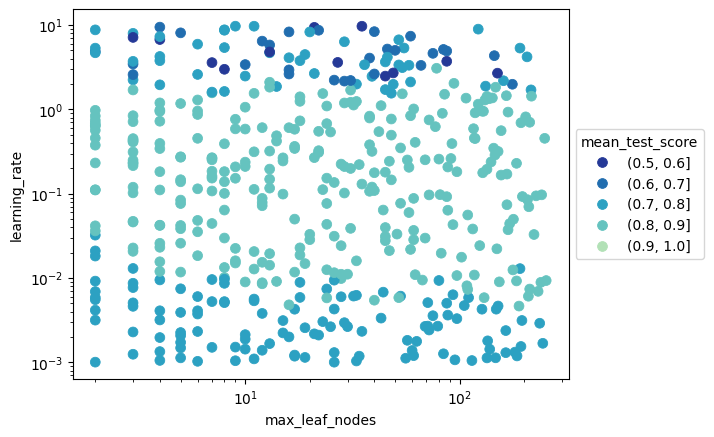

In [4]:
import seaborn as sns
import numpy as np

df=pd.DataFrame(
    {"max_leaf_nodes": cv_results["max_leaf_nodes"],
     "learning_rate":cv_results["learning_rate"],
     "score_bin":pd.cut(
         cv_results["mean_test_score"], bins=np.linspace(0.5, 1.0, 6)
     )}
)

sns.set_palette("YlGnBu_r")
ax = sns.scatterplot(
    data=df,
    x="max_leaf_nodes",
    y="learning_rate",
    hue="score_bin",
    s=50,
    color="k",
    edgecolor=None
)
ax.set_xscale("log")
ax.set_yscale("log")

_ = ax.legend(
    title="mean_test_score", loc="center left", bbox_to_anchor=(1, 0.5)
)

In [5]:
import numpy as np
import plotly.express as px

fig = px.parallel_coordinates(
    cv_results.rename(shorten_param, axis=1).apply(
        {
            "learning_rate": np.log10,
            "max_leaf_nodes": np.log2,
            "max_bins": np.log2,
            "min_samples_leaf": np.log10,
            "l2_regularization": np.log10,
            "mean_test_score": lambda x: x,
        }
    ),
    color="mean_test_score",
    color_continuous_scale = px.colors.sequential.Viridis,
)
fig.show()